<a href="https://colab.research.google.com/github/anas-abulehia/Control-Mujoco/blob/main/Control_System_of_a_Grasp_of_A_crane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sym # import some essential libraries and set up the printing function
from sympy import *
from sympy.physics.vector import dynamicsymbols
from sympy.physics.mechanics import *
import control
import numpy 
init_vprinting()
from pytube import YouTube



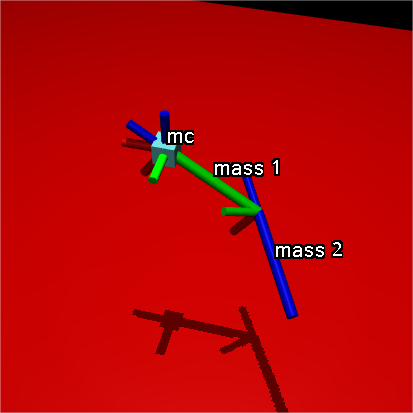
<br>
The figure shows the bodies and joint frames 

The System uncontrolled 


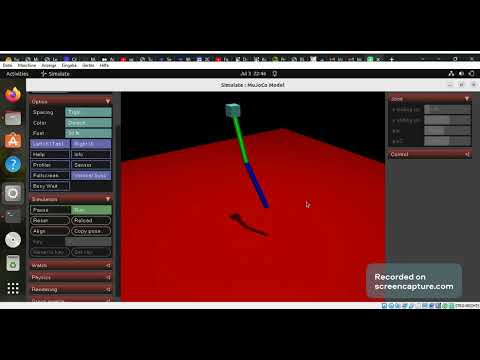

In [ ]:
from IPython.display import YouTubeVideo
print("The System uncontrolled ")
YouTubeVideo('wq-b49y99ZA')

In [ ]:
t = sym.symbols('t')# define time variable 
g = sym.symbols('g')# Gravitational Acceleration
f_x,f_y = dynamicsymbols('f_x,f_y')#Forces act on the system
m_c, m_1, m_2,l_1,l_2, j_1, j_2 = sym.symbols('m_c,m_1, m_2,l_1,l_2,j_1,j_2',real=True)
n = 2               #number of masses
q = dynamicsymbols('q_:' + str(n ))  # Generalized coordinates positions in x , y , z for m_c
q_dot = dynamicsymbols('q_:'+ str(n ),1)# Generalized coordinates velocities in x , y , z for m_c
theta = dynamicsymbols('theta_:' + str(n + 1))# Generalized coordinates angular positions theta1,theta2 for m_1 and m_2
theta.remove(theta[0])# just to make thetas start from 1 
theta_dot = dynamicsymbols('theta_:'+str(n + 1),1)# # Generalized coordinates angular velocities  for m_1 and m_2
theta_dot.remove(theta_dot[0])# just to make thetas start from 1
p = q+theta#stack all generalized coordinates in one vetor p
p_dot = q_dot+theta_dot#stack all generalized velocities in one vetor p
p,p_dot,m_c, m_1, m_2,l_1,l_2, j_1, j_2

In [ ]:
CG_c_0 = sym.Matrix([0,0,0,1])      #center of Gravity of mass c in frame 0
CG_1_1 = sym.Matrix([0,0,-l_1/2,1]) #center of Gravity of mass 1 in frame 1
CG_2_3 = sym.Matrix([0,0,-l_2/2,1]) #center of Gravity of mass 2 in frame 3
CG_c_0,CG_1_1,CG_2_3                # see the figure in the next field

⎛     ⎡ 0  ⎤  ⎡ 0  ⎤⎞
⎜⎡0⎤  ⎢    ⎥  ⎢    ⎥⎟
⎜⎢ ⎥  ⎢ 0  ⎥  ⎢ 0  ⎥⎟
⎜⎢0⎥  ⎢    ⎥  ⎢    ⎥⎟
⎜⎢ ⎥, ⎢-l₁ ⎥, ⎢-l₂ ⎥⎟
⎜⎢0⎥  ⎢────⎥  ⎢────⎥⎟
⎜⎢ ⎥  ⎢ 2  ⎥  ⎢ 2  ⎥⎟
⎜⎣1⎦  ⎢    ⎥  ⎢    ⎥⎟
⎝     ⎣ 1  ⎦  ⎣ 1  ⎦⎠

In [ ]:
CG_2_3
T_0_W = sym.Matrix([[1,0,0,p[0]],[0,1,0,p[1]],[0,0,1,2.5],[0,0,0,1]])                         #Transformation matrix from frame 0 to W
T_1_0 = sym.Matrix([[cos(p[2]),0,sin(p[2]),0],[0,1,0,0],[-sin(p[2]),0,cos(p[2]),0],[0,0,0,1]]) #Transformation matrix from frame 1 to 0
T_2_1 = sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,-l_1],[0,0,0,1]])                               #Transformation matrix from frame 2 to 1
T_3_2 = sym.Matrix([[1,0,0,0],[0,cos(p[3]),-sin(p[3]),0],[0,sin(p[3]),cos(p[3]),0],[0,0,0,1]]) #Transformation matrix from frame 3 to 2
T_0_W,T_1_0,T_2_1,T_3_2       

⎛⎡1  0  0  q₀ ⎤  ⎡cos(θ₁)   0  sin(θ₁)  0⎤  ⎡1  0  0   0 ⎤  ⎡1     0        0 
⎜⎢            ⎥  ⎢                       ⎥  ⎢            ⎥  ⎢                 
⎜⎢0  1  0  q₁ ⎥  ⎢   0      1     0     0⎥  ⎢0  1  0   0 ⎥  ⎢0  cos(θ₂)  -sin(
⎜⎢            ⎥, ⎢                       ⎥, ⎢            ⎥, ⎢                 
⎜⎢0  0  1  2.5⎥  ⎢-sin(θ₁)  0  cos(θ₁)  0⎥  ⎢0  0  1  -l₁⎥  ⎢0  sin(θ₂)  cos(θ
⎜⎢            ⎥  ⎢                       ⎥  ⎢            ⎥  ⎢                 
⎝⎣0  0  0   1 ⎦  ⎣   0      0     0     1⎦  ⎣0  0  0   1 ⎦  ⎣0     0        0 

     0⎤⎞
      ⎥⎟
θ₂)  0⎥⎟
      ⎥⎟
₂)   0⎥⎟
      ⎥⎟
     1⎦⎠

In [ ]:
CG_c = T_0_W* CG_c_0                 #Center of Gravity of mass c represented in W frame
CG_1 = T_0_W*T_1_0*CG_1_1            #Center of Gravity of mass one represented in W frame
CG_2 =T_0_W*T_1_0*T_2_1*T_3_2*CG_2_3 #Center of Gravity of mass two represented in W frame
CG_c,CG_1,CG_2

⎛                             ⎡              l₂⋅sin(θ₁)⋅cos(θ₂)      ⎤⎞
⎜       ⎡  l₁⋅sin(θ₁)      ⎤  ⎢-l₁⋅sin(θ₁) - ────────────────── + q₀ ⎥⎟
⎜       ⎢- ────────── + q₀ ⎥  ⎢                      2               ⎥⎟
⎜⎡q₀ ⎤  ⎢      2           ⎥  ⎢                                      ⎥⎟
⎜⎢   ⎥  ⎢                  ⎥  ⎢           l₂⋅sin(θ₂)                 ⎥⎟
⎜⎢q₁ ⎥  ⎢        q₁        ⎥  ⎢           ────────── + q₁            ⎥⎟
⎜⎢   ⎥, ⎢                  ⎥, ⎢               2                      ⎥⎟
⎜⎢2.5⎥  ⎢  l₁⋅cos(θ₁)      ⎥  ⎢                                      ⎥⎟
⎜⎢   ⎥  ⎢- ────────── + 2.5⎥  ⎢              l₂⋅cos(θ₁)⋅cos(θ₂)      ⎥⎟
⎜⎣ 1 ⎦  ⎢      2           ⎥  ⎢-l₁⋅cos(θ₁) - ────────────────── + 2.5⎥⎟
⎜       ⎢                  ⎥  ⎢                      2               ⎥⎟
⎜       ⎣        1         ⎦  ⎢                                      ⎥⎟
⎝                             ⎣                  1                   ⎦⎠

In [ ]:
position= []
position.append(sym.Matrix(CG_c[0:3]))
position.append(sym.Matrix(CG_1[0:3]))
position.append(sym.Matrix(CG_2[0:3]))
position

⎡                             ⎡              l₂⋅sin(θ₁)⋅cos(θ₂)      ⎤⎤
⎢       ⎡  l₁⋅sin(θ₁)      ⎤  ⎢-l₁⋅sin(θ₁) - ────────────────── + q₀ ⎥⎥
⎢       ⎢- ────────── + q₀ ⎥  ⎢                      2               ⎥⎥
⎢⎡q₀ ⎤  ⎢      2           ⎥  ⎢                                      ⎥⎥
⎢⎢   ⎥  ⎢                  ⎥  ⎢           l₂⋅sin(θ₂)                 ⎥⎥
⎢⎢q₁ ⎥, ⎢        q₁        ⎥, ⎢           ────────── + q₁            ⎥⎥
⎢⎢   ⎥  ⎢                  ⎥  ⎢               2                      ⎥⎥
⎢⎣2.5⎦  ⎢  l₁⋅cos(θ₁)      ⎥  ⎢                                      ⎥⎥
⎢       ⎢- ────────── + 2.5⎥  ⎢              l₂⋅cos(θ₁)⋅cos(θ₂)      ⎥⎥
⎢       ⎣      2           ⎦  ⎢-l₁⋅cos(θ₁) - ────────────────── + 2.5⎥⎥
⎣                             ⎣                      2               ⎦⎦

# Finding Kinetic Energy T

    The Kinetic Energy contains 2 components. The first component is kinetic energy due to translation. The second component is rotatory kinetic energy. First part, we compute the velocity at each center of gravity by simply differentiate position with time. Then we compute V^2 for each center of gravity

### 1) find velocities of each center of mass 

In [ ]:
v=[]
for i in position:
    v.append (sym.diff(i,'t'))
v

⎡                              ⎡                 l₂⋅sin(θ₁)⋅sin(θ₂)⋅θ₂̇   l₂⋅c
⎢      ⎡  l₁⋅cos(θ₁)⋅θ₁̇     ⎤  ⎢-l₁⋅cos(θ₁)⋅θ₁̇ + ───────────────────── - ───
⎢      ⎢- ───────────── + q₀̇⎥  ⎢                           2                 
⎢⎡q₀̇⎤  ⎢        2           ⎥  ⎢                                             
⎢⎢  ⎥  ⎢                    ⎥  ⎢                        l₂⋅cos(θ₂)⋅θ₂̇        
⎢⎢q₁̇⎥, ⎢         q₁̇         ⎥, ⎢                        ───────────── + q₁̇ 
⎢⎢  ⎥  ⎢                    ⎥  ⎢                              2               
⎢⎣0 ⎦  ⎢   l₁⋅sin(θ₁)⋅θ₁̇    ⎥  ⎢                                             
⎢      ⎢   ─────────────    ⎥  ⎢                   l₂⋅sin(θ₁)⋅cos(θ₂)⋅θ₁̇   l₂
⎢      ⎣         2          ⎦  ⎢   l₁⋅sin(θ₁)⋅θ₁̇ + ───────────────────── + ──
⎣                              ⎣                             2                

os(θ₁)⋅cos(θ₂)⋅θ₁̇     ⎤⎤
────────────────── + q₀̇⎥⎥
      2               ⎥⎥
                      ⎥⎥
                      ⎥⎥
  

### 2) find velocities Square of each center of mass (dot product)

In [ ]:
v_0 = sym.Matrix(v[0])
v_1 = sym.Matrix(v[1])
v_2 = sym.Matrix(v[2])
V_squared = sym.Matrix([sym.expand(v_0.dot(v_0)),sym.expand(v_1.dot(v_1)),sym.expand(v_2.dot(v_2))])#dot prodcut each velocity vector with itself
V_squared[1] = sym.trigsimp(V_squared[1])#trignometric simplifications 
V_squared[2] = sym.trigsimp(V_squared[2])#trignometric simplifications 


In [ ]:
V_squared[0]

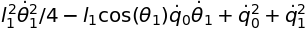

In [ ]:
V_squared[1]

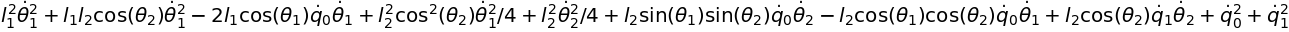

In [ ]:
V_squared[2]

In [ ]:
V_squared

⎡                                                                             
⎢                                                                            q
⎢                                                                             
⎢                                                                2   2        
⎢                                                              l₁ ⋅θ₁̇        
⎢                                                              ─────── - l₁⋅co
⎢                                                                 4           
⎢                                                                             
⎢                                                     2    2       2     2   2
⎢  2   2                   2                        l₂ ⋅cos (θ₂)⋅θ₁̇    l₂ ⋅θ₂
⎢l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  - 2⋅l₁⋅cos(θ₁)⋅q₀̇⋅θ₁̇ + ──────────────── + ───
⎣                                                          4              4   

 2     2                                           

### 3) Apply kinetic energy equation 
$$ K = {{1}\over{2}} {m_1}{v_1^2}+{{1}\over{2}} {m_2}  {v_2^2} + {{1}\over{2}} {J_1} {\dot \theta_1^2}+ {{1}\over{2}} {J_2} {\dot \theta_2^2}$$

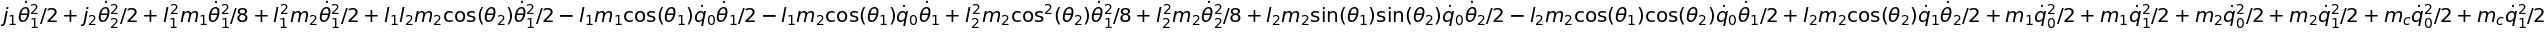

In [ ]:
K = Rational(1,2) *m_c* V_squared[0] + Rational(1,2) *m_1* V_squared[1] + Rational(1,2) *m_2* V_squared[2] + Rational(1,2)*j_1*p_dot[2]**2 + Rational(1,2)*j_2*p_dot[3]**2 
K = sym.expand(K)
K = sym.trigsimp(K)#trignometric simplifications 
K 

### 4) Finding Potential Energy V
$$U = m_cgz_c + m_1gz_1 + m_2gz_2$$

In [ ]:
U = sym.expand(m_c*g*position[0][2] + m_1*g*position[1][2] + m_2*g*position[2][2])
U

### 5) Finding The Lagrangian $$L = K- U $$

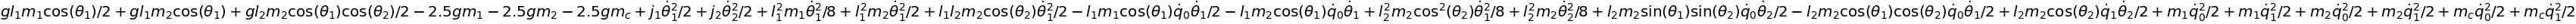

In [ ]:
L = K-U
L

### 6) Apply L in Euler Lagrange Equations
$$\frac{\mathrm{d}}{\mathrm{d}t}\Big(\frac{\partial{L}}{\partial{\dot {q_i}}}\Big) - \frac{\partial{L}} {\partial{ {q_i}}} = Q_{i} $$
where $ Q_{i}$ represents the input force

##### 6.1) Apply Euler Lagrange Equations for The coordinates $q_i $ as coordinates are stacked in vector p

$$\frac{\partial{L}}{\partial{\dot{q_{i}}}}$$ equals

In [ ]:
dLqdot = [];

for i in range(len(p_dot)):
    print(p_dot[i])
    dLqdot.append(sym.diff(L,p_dot[i]))
    
dLqdot = sym.Matrix(dLqdot)
dLqdot

Derivative(q_0(t), t)
Derivative(q_1(t), t)
Derivative(theta_1(t), t)
Derivative(theta_2(t), t)


⎡            l₁⋅m₁⋅cos(θ₁)⋅θ₁̇                      l₂⋅m₂⋅sin(θ₁)⋅sin(θ₂)⋅θ₂̇ 
⎢          - ──────────────── - l₁⋅m₂⋅cos(θ₁)⋅θ₁̇ + ──────────────────────── -
⎢                   2                                         2               
⎢                                                                             
⎢                                                l₂⋅m₂⋅cos(θ₂)⋅θ₂̇            
⎢                                                ──────────────── + m₁⋅q₁̇ + m
⎢                                                       2                     
⎢                                                                             
⎢          2                                                                  
⎢        l₁ ⋅m₁⋅θ₁̇     2                               l₁⋅m₁⋅cos(θ₁)⋅q₀̇     
⎢j₁⋅θ₁̇ + ───────── + l₁ ⋅m₂⋅θ₁̇ + l₁⋅l₂⋅m₂⋅cos(θ₂)⋅θ₁̇ - ──────────────── - l
⎢            4                                                2               
⎢                                                   

##### 6.2) Completion the derivation of Lagrange by taking the derivative with respect to time as shown in the equation below

$$\frac{\mathrm{d}}{\mathrm{d}t}\Big(\frac{\partial{L}}{\partial{\dot{q_{0:n}}}}\Big )$$ equals

In [ ]:
ddLqdotdt = [];

for i in range(len(dLqdot)):
    ddLqdotdt.append(sym.diff(dLqdot[i],'t'))
ddLqdotdt = sym.Matrix(ddLqdotdt)
ddLqdotdt

⎡                                            2                                
⎢                            l₁⋅m₁⋅sin(θ₁)⋅θ₁̇    l₁⋅m₁⋅cos(θ₁)⋅θ₁̈           
⎢                            ───────────────── - ──────────────── + l₁⋅m₂⋅sin(
⎢                                    2                  2                     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢          2                                                                  
⎢        l₁ ⋅m₁⋅θ₁̈     2                                                     
⎢j₁⋅θ₁̈ + ───────── + l₁ ⋅m₂⋅θ₁̈ - l₁⋅l₂⋅m₂⋅sin(θ₂)⋅

##### 6.3) Completion the derivation of Lagrange by taking the finding the derivative of the Lagrangian with $q_{i:n}$
$$ \frac{\partial{L}} {\partial{ {q_i}}} $$

In [ ]:
dLdq = []
for i in range(len(p)):
    dLdq.append(sym.diff(L,p[i]))
dLdq = sym.Matrix(dLdq)
dLdq

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  g⋅l₁⋅m₁⋅sin(θ₁)                     g⋅l₂⋅m₂⋅sin(θ₁)⋅cos(θ₂)   l₁⋅m₁⋅sin(θ₁)
⎢- ─────────────── - g⋅l₁⋅m₂⋅sin(θ₁) - ─────────────────────── + ─────────────
⎢         2                                       2                       2   
⎢                                                                             
⎢                                                  2     2                    
⎢     g⋅l₂⋅m₂⋅sin(θ₂)⋅cos(θ₁)   l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁̇    l₂ ⋅m₂⋅sin(θ₂)⋅cos(θ₂)
⎢   - ─────────────────────── - ──────────────────── - ───────────────────────
⎣                2                       2                         4          

     0                                             

##### 6.4) The last part of the equation is input forces, we have 3 input forces, there are no external moments acting on the joints

In [ ]:
Q = [f_x,f_y,0,0]#left hand side of the Lagrange Equation
left_hand_side = Q

In [ ]:
right_hand_side = ddLqdotdt - dLdq
right_hand_side

⎡                       2                                                     
⎢       l₁⋅m₁⋅sin(θ₁)⋅θ₁̇    l₁⋅m₁⋅cos(θ₁)⋅θ₁̈                   2            
⎢       ───────────────── - ──────────────── + l₁⋅m₂⋅sin(θ₁)⋅θ₁̇  - l₁⋅m₂⋅cos(
⎢               2                  2                                          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                        2    
⎢g⋅l₁⋅m₁⋅sin(θ₁)                     g⋅l₂⋅m₂⋅sin(θ₁)⋅cos(θ₂)           l₁ ⋅m₁⋅
⎢─────────────── + g⋅l₁⋅m₂⋅sin(θ₁) + ───────────────

In [ ]:
## We can use a function from Sympy for computing the Lagrange Equations

In [ ]:
LM = LagrangesMethod(L,p)#create a Lagrange method object, note we have not incorporeated Q vector 'force input'
LM.form_lagranges_equations()#The result is identical to the result of the right_hand_side in the field above

⎡                       2                                                     
⎢       l₁⋅m₁⋅sin(θ₁)⋅θ₁̇    l₁⋅m₁⋅cos(θ₁)⋅θ₁̈                   2            
⎢       ───────────────── - ──────────────── + l₁⋅m₂⋅sin(θ₁)⋅θ₁̇  - l₁⋅m₂⋅cos(
⎢               2                  2                                          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                        2    
⎢g⋅l₁⋅m₁⋅sin(θ₁)                     g⋅l₂⋅m₂⋅sin(θ₁)⋅cos(θ₂)           l₁ ⋅m₁⋅
⎢─────────────── + g⋅l₁⋅m₂⋅sin(θ₁) + ───────────────

In [ ]:
LM.form_lagranges_equations()- right_hand_side#that means the derivation is correct 

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

## Euler Lagrange Equations Decomposition 

Euler Lagrange Equations could be written in the form 
$$\mathbf{M}(q, t) \dot{x} = \mathbf{f}(q, \dot{q}, t)+Q$$
where $\dot x$ is 
$$\displaystyle \left[\begin{matrix}\dot  q_{0}\\ \dot q_{1}\\ \dot  \theta_{1}\\ \dot \theta_{2}\\ \ddot q_{0}\\ \ddot q_{1}\\ \ddot \theta_{1}\\ \ddot \theta_{2}\end{matrix}\right]
$$


In [ ]:
BigM = LM.mass_matrix_full;#Mass matrix with full states 
BigM

⎡1  0  0  0                             0                                   0 
⎢                                                                             
⎢0  1  0  0                             0                                   0 
⎢                                                                             
⎢0  0  1  0                             0                                   0 
⎢                                                                             
⎢0  0  0  1                             0                                   0 
⎢                                                                             
⎢                                                                             
⎢0  0  0  0                       m₁ + m₂ + m_c                             0 
⎢                                                                             
⎢                                                                             
⎢                                                   

In [ ]:
LM.forcing_full#f matrix full

⎡                                                             q₀̇             
⎢                                                                             
⎢                                                             q₁̇             
⎢                                                                             
⎢                                                             θ₁̇             
⎢                                                                             
⎢                                                             θ₂̇             
⎢                                                                             
⎢                  2                                               2          
⎢  l₁⋅m₁⋅sin(θ₁)⋅θ₁̇                    2   l₂⋅m₂⋅sin(θ₁)⋅cos(θ₂)⋅θ₁̇    l₂⋅m₂
⎢- ───────────────── - l₁⋅m₂⋅sin(θ₁)⋅θ₁̇  - ───────────────────────── - ──────
⎢          2                                           2                      
⎢                                                   

In [ ]:
Q_full= sym.Matrix([[0],[0],[0],[0],[Q[0]],[Q[1]],[Q[2]],[Q[3]]])#stack Q (inputs) with zeros to keep dimension consistancy 
Q_full

⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢fₓ ⎥
⎢   ⎥
⎢f_y⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣ 0 ⎦

In [ ]:
LHS = BigM
RHS = Q_full + LM.forcing_full
u = Q_full

In [ ]:
RHS

⎡                                                                q₀̇          
⎢                                                                             
⎢                                                                q₁̇          
⎢                                                                             
⎢                                                                θ₁̇          
⎢                                                                             
⎢                                                                θ₂̇          
⎢                                                                             
⎢                  2                                               2          
⎢  l₁⋅m₁⋅sin(θ₁)⋅θ₁̇                    2   l₂⋅m₂⋅sin(θ₁)⋅cos(θ₂)⋅θ₁̇    l₂⋅m₂
⎢- ───────────────── - l₁⋅m₂⋅sin(θ₁)⋅θ₁̇  - ───────────────────────── - ──────
⎢          2                                           2                      
⎢                                                   

In [ ]:
LHS

⎡1  0  0  0                             0                                   0 
⎢                                                                             
⎢0  1  0  0                             0                                   0 
⎢                                                                             
⎢0  0  1  0                             0                                   0 
⎢                                                                             
⎢0  0  0  1                             0                                   0 
⎢                                                                             
⎢                                                                             
⎢0  0  0  0                       m₁ + m₂ + m_c                             0 
⎢                                                                             
⎢                                                                             
⎢                                                   

In [ ]:
state_vector = p+p_dot
state_vector          #our state vector is composed of positions and velocities

## Linearization of The System
the linearized system takes this form:

$$\mathbf{M} \Delta\dot{\mathbf{x}} = \mathbf{f_{A}} \Delta \mathbf{x} + \mathbf{f_{B}}\Delta{\mathbf{u}}$$
where $\mathbf{f_{A}} $ is the Jacobians of $\mathbf{f}(q, \dot{q}, t)$ with respect to the state vector $\mathbf{x}$\\
and $\mathbf{f_{B}}$ is the jacobian w.r.t input vector $u$

#### We define our equilibrium.
It is very close to the desired output of the system. 

In [ ]:
#equilibrium_points = zeros(8,1)
equilibrium_points = [0,0,0,0,0,0,0,0]
equilibrium_points

put equilibrium_points in a dictionary  

In [ ]:
equilibrium_dict = dict(zip(p+p_dot,equilibrium_points))
equilibrium_dict

#### We define our System's Constants 'Parameteres that do not change with time'.

In [ ]:
parameter_dict = dict(zip((m_c, m_1, m_2, j_1, j_2,l_1,l_2,g),(.5,1,1,0.083958,0.083958,1,1,9.81)))
parameter_dict

#### Compute the Jocobian f_A

In [ ]:
F_A = RHS.jacobian(state_vector)
F_A

⎡0  0                                                                0        
⎢                                                                             
⎢0  0                                                                0        
⎢                                                                             
⎢0  0                                                                0        
⎢                                                                             
⎢0  0                                                                0        
⎢                                                                             
⎢                        2                                                    
⎢        l₁⋅m₁⋅cos(θ₁)⋅θ₁̇                    2                               
⎢0  0  - ───────────────── - l₁⋅m₂⋅cos(θ₁)⋅θ₁̇  + l₂⋅m₂⋅sin(θ₁)⋅sin(θ₂)⋅θ₁̇⋅θ₂
⎢                2                                                            
⎢                                                   

#### Substiute constants and equilibrium point in f_A 

In [ ]:
F_A = F_A.subs(parameter_dict)

In [ ]:
F_A = F_A.subs(equilibrium_dict)
F_A

⎡0  0    0       0     1  0  0  0⎤
⎢                                ⎥
⎢0  0    0       0     0  1  0  0⎥
⎢                                ⎥
⎢0  0    0       0     0  0  1  0⎥
⎢                                ⎥
⎢0  0    0       0     0  0  0  1⎥
⎢                                ⎥
⎢0  0    0       0     0  0  0  0⎥
⎢                                ⎥
⎢0  0    0       0     0  0  0  0⎥
⎢                                ⎥
⎢0  0  -19.62    0     0  0  0  0⎥
⎢                                ⎥
⎣0  0    0     -4.905  0  0  0  0⎦

#### Compute the Jocobian F_B

In [ ]:
u = Q_full[4:6];#input forces vector 
F_B = RHS.jacobian(u);
F_B

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢1  0⎥
⎢    ⎥
⎢0  1⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

#### Now we move to mass matrix we compute it around the Equilibrium point and then substitute the constants

In [ ]:
M = BigM.subs(equilibrium_dict)
M

⎡1  0  0  0             0                   0                           0     
⎢                                                                             
⎢0  1  0  0             0                   0                           0     
⎢                                                                             
⎢0  0  1  0             0                   0                           0     
⎢                                                                             
⎢0  0  0  1             0                   0                           0     
⎢                                                                             
⎢                                                              l₁⋅m₁          
⎢0  0  0  0       m₁ + m₂ + m_c             0                - ───── - l₁⋅m₂ -
⎢                                                                2            
⎢                                                                             
⎢                                                   

In [ ]:
M = M.subs(parameter_dict)
M

⎡1  0  0  0   0    0      0         0    ⎤
⎢                                        ⎥
⎢0  1  0  0   0    0      0         0    ⎥
⎢                                        ⎥
⎢0  0  1  0   0    0      0         0    ⎥
⎢                                        ⎥
⎢0  0  0  1   0    0      0         0    ⎥
⎢                                        ⎥
⎢0  0  0  0  2.5   0      -2        0    ⎥
⎢                                        ⎥
⎢0  0  0  0   0   2.5     0        1/2   ⎥
⎢                                        ⎥
⎢0  0  0  0  -2    0   2.583958     0    ⎥
⎢                                        ⎥
⎣0  0  0  0   0   1/2     0      0.333958⎦

#### The last step in linearization is premultiplying the equation$\mathbf{M} \Delta\dot{\mathbf{x}} = \mathbf{f_{A}} \Delta \mathbf{x} + \mathbf{f_{B}}\Delta{\mathbf{u}}$ with $\mathbf{M^{-1}}$  to get A and B matrix ; System and input matrices

In [ ]:
from numpy import array,  eye, asarray, dot, rad2deg
from numpy.linalg import inv
invM = inv(array(M,dtype = float))
invM = sym.Matrix(invM)
invM

⎡1.0  0.0  0.0  0.0         0.0                0.0                 0.0        
⎢                                                                             
⎢0.0  1.0  0.0  0.0         0.0                0.0                 0.0        
⎢                                                                             
⎢0.0  0.0  1.0  0.0         0.0                0.0                 0.0        
⎢                                                                             
⎢0.0  0.0  0.0  1.0         0.0                0.0                 0.0        
⎢                                                                             
⎢0.0  0.0  0.0  0.0  1.05043426650325          0.0          0.813042833129057 
⎢                                                                             
⎢0.0  0.0  0.0  0.0         0.0         0.570970858017251          0.0        
⎢                                                                             
⎢0.0  0.0  0.0  0.0  0.813042833129057         0.0  

In [ ]:
A = dot(invM, F_A)
A = sym.Matrix(A)
A

⎡0  0          0                  0          1.0   0    0    0 ⎤
⎢                                                              ⎥
⎢0  0          0                  0           0   1.0   0    0 ⎥
⎢                                                              ⎥
⎢0  0          0                  0           0    0   1.0   0 ⎥
⎢                                                              ⎥
⎢0  0          0                  0           0    0    0   1.0⎥
⎢                                                              ⎥
⎢0  0  -15.9519003859921          0           0    0    0    0 ⎥
⎢                                                              ⎥
⎢0  0          0          4.19306029287308    0    0    0    0 ⎥
⎢                                                              ⎥
⎢0  0  -19.9398754824901          0           0    0    0    0 ⎥
⎢                                                              ⎥
⎣0  0          0          -20.9653014643654   0    0    0    0 ⎦

In [ ]:
F_B = RHS.jacobian(u);
F_B

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢1  0⎥
⎢    ⎥
⎢0  1⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

In [ ]:
B = dot(invM, F_B)
B = sym.Matrix(B)
B

⎡        0                  0         ⎤
⎢                                     ⎥
⎢        0                  0         ⎥
⎢                                     ⎥
⎢        0                  0         ⎥
⎢                                     ⎥
⎢        0                  0         ⎥
⎢                                     ⎥
⎢1.05043426650325           0         ⎥
⎢                                     ⎥
⎢        0          0.570970858017251 ⎥
⎢                                     ⎥
⎢0.813042833129057          0         ⎥
⎢                                     ⎥
⎣        0          -0.854854290086255⎦

In [ ]:


ctrbMatrix = control.ctrb(A,B)
ctrbMatrix = sym.Matrix(ctrbMatrix)
ctrbMatrix

⎡       0.0                0.0          1.05043426650325          0.0         
⎢                                                                             
⎢       0.0                0.0                 0.0         0.570970858017251  
⎢                                                                             
⎢       0.0                0.0          0.813042833129057         0.0         
⎢                                                                             
⎢       0.0                0.0                 0.0         -0.854854290086255 
⎢                                                                             
⎢1.05043426650325          0.0                 0.0                0.0         
⎢                                                                             
⎢       0.0         0.570970858017251          0.0                0.0         
⎢                                                                             
⎢0.813042833129057         0.0                 0.0  

In [ ]:
import numpy 
numpy.linalg.matrix_rank(array((ctrbMatrix),dtype='float'))

8

In [ ]:
C = sym.Matrix([[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0]])
x = sym.Matrix([[p[0]],[p[1]],[theta[0]],[theta[1]],[p_dot[0]],[p_dot[1]],[theta_dot[0]],[theta_dot[1]]])
C,C*x

⎛⎡0  0  1  0  0  0  0  0⎤  ⎡θ₁⎤⎞
⎜⎢                      ⎥, ⎢  ⎥⎟
⎝⎣0  0  0  1  0  0  0  0⎦  ⎣θ₂⎦⎠

In [ ]:
observ = control.obsv(A,C)
observ = sym.Matrix(observ)
observ

⎡0.0  0.0         1.0                0.0         0.0  0.0         0.0         
⎢                                                                             
⎢0.0  0.0         0.0                1.0         0.0  0.0         0.0         
⎢                                                                             
⎢0.0  0.0         0.0                0.0         0.0  0.0         1.0         
⎢                                                                             
⎢0.0  0.0         0.0                0.0         0.0  0.0         0.0         
⎢                                                                             
⎢0.0  0.0  -19.9398754824901         0.0         0.0  0.0         0.0         
⎢                                                                             
⎢0.0  0.0         0.0         -20.9653014643654  0.0  0.0         0.0         
⎢                                                                             
⎢0.0  0.0         0.0                0.0         0.0

In [ ]:
numpy.linalg.matrix_rank(array((observ),dtype='float'))

4

In [ ]:
Q = sym.Matrix([[1,0, 0, 0, 0, 0, 0, 0],[0 ,1, 0, 0, 0, 0, 0, 0],[0, 0, 20, 0, 0, 0, 0, 0],[0, 0, 0, 20, 0, 0, 0, 0],[0 ,0, 0, 0, 1, 0, 0, 0],[0 ,0, 0, 0, 0, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 0],[0 ,0 ,0, 0, 0, 0, 0, 1]])
Q = 20*sym.eye(8)
Q

⎡20  0   0   0   0   0   0   0 ⎤
⎢                              ⎥
⎢0   20  0   0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   20  0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   0   20  0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   0   0   20  0   0   0 ⎥
⎢                              ⎥
⎢0   0   0   0   0   20  0   0 ⎥
⎢                              ⎥
⎢0   0   0   0   0   0   20  0 ⎥
⎢                              ⎥
⎣0   0   0   0   0   0   0   20⎦

In [ ]:
R = sym.eye(2)
R

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [ ]:
K, S, E = control.lqr(A, B, Q, R)
K = sym.Matrix(K)
states = sym.Matrix(state_vector)
K*states

⎡4.47213595499959⋅q₀ + 4.87448956869029⋅θ₁ + 6.84141782312229⋅q₀̇ + 0.08224076
⎢                                                                             
⎣ 4.47213595499958⋅q₁ - 8.65258987383115⋅θ₂ + 7.08870104336182⋅q₁̇ - 2.7589413

73418783⋅θ₁̇⎤
          ⎥
1798084⋅θ₂̇ ⎦

The system after writing the control law 


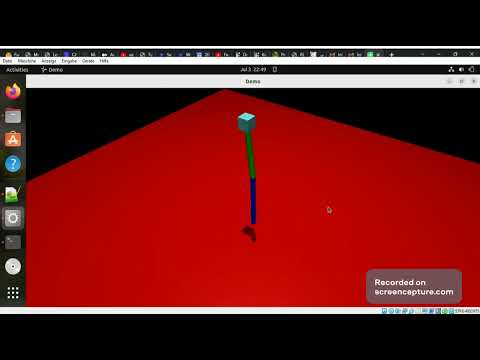

In [ ]:
from IPython.display import YouTubeVideo
print("The system after writing the control law ")
YouTubeVideo('ygOSoOh8YXE')

In [ ]:
states

⎡q₀⎤
⎢  ⎥
⎢q₁⎥
⎢  ⎥
⎢θ₁⎥
⎢  ⎥
⎢θ₂⎥
⎢  ⎥
⎢q₀̇⎥
⎢  ⎥
⎢q₁̇⎥
⎢  ⎥
⎢θ₁̇⎥
⎢  ⎥
⎣θ₂̇⎦